# AStar Navmesh pathfinder for game agent

### Purpose

The purpose of this technique is to utilise the AStar algorithm to allow for a hypothetical AI agent to navigate to a target destination (representing the player). To build the map, the code will generate a 1:1 ratio map representing the space for the game agent to navigate through.

### Prerequisites

The code utilises the a star algorithm coupled with the visualiser provided by the Lab2 task provided in 'Introduction to Artificial Intelligence"

In [1]:
from graphProblem import *
from search_algorithms import *
from search_algorithms_for_graph import *
from heuristics import *
from navmesh import *

#This is for random integer generation managed by a seed value
from random import seed
from random import randint

## Populating Nodes

As a navmesh, we generate nodes from the specified size. Note that these dimensiosn are scaled by a 1:1 ratio (as a square). These nodes are equally linked and weighted, as this is undertaking the depiction of a game map. The nodes are generally spaced to represent the whole game map.

In [2]:

## Must preserve an aspect ratio of 1:1
width = 10
height = width

grid_size = 1 #Defines the general displacement of each node position on both x and y
nodes = []

nodeIndex = 0 #We give each node an index number representing the node

#Defines the nodes first
for x in range(width):
    for y in range(height):
        node = [str(nodeIndex), (x * grid_size, y *grid_size)]
        nodes.append(node)
        nodeIndex += 1;

In [3]:
#We define the navmesh node list
navmesh_nodes = []

In [4]:
#Generates the navmesh nodes and store the values to the 'navmesh_nodes' list
generate_navmesh(width, height, nodes, navmesh_nodes)

Bottom left corner
['0', [['1', 1], ['11', 1], ['10', 1]]]
Left Edge
['1', [['2', 1], ['12', 1], ['11', 1], ['10', 1], ['0', 1]]]
Left Edge
['2', [['3', 1], ['13', 1], ['12', 1], ['11', 1], ['1', 1]]]
Left Edge
['3', [['4', 1], ['14', 1], ['13', 1], ['12', 1], ['2', 1]]]
Left Edge
['4', [['5', 1], ['15', 1], ['14', 1], ['13', 1], ['3', 1]]]
Left Edge
['5', [['6', 1], ['16', 1], ['15', 1], ['14', 1], ['4', 1]]]
Left Edge
['6', [['7', 1], ['17', 1], ['16', 1], ['15', 1], ['5', 1]]]
Left Edge
['7', [['8', 1], ['18', 1], ['17', 1], ['16', 1], ['6', 1]]]
Left Edge
['8', [['9', 1], ['19', 1], ['18', 1], ['17', 1], ['7', 1]]]
Top left corner
['9', [['19', 1], ['18', 1], ['8', 1]]]
Bottom Edge
['10', [['0', 1], ['1', 1], ['11', 1], ['21', 1], ['20', 1]]]
Normal case
['11', [['12', 1], ['22', 1], ['21', 1], ['20', 1], ['10', 1], ['2', 1], ['1', 1], ['0', 1]]]
Normal case
['12', [['13', 1], ['23', 1], ['22', 1], ['21', 1], ['11', 1], ['3', 1], ['2', 1], ['1', 1]]]
Normal case
['13', [['14', 1], 

In [5]:
#
mesh_graph_data, mesh_graph = define_graph(navmesh_nodes, nodes, True)

## Reveal visualised graph of the navmesh nodes
This displays the printed output from before

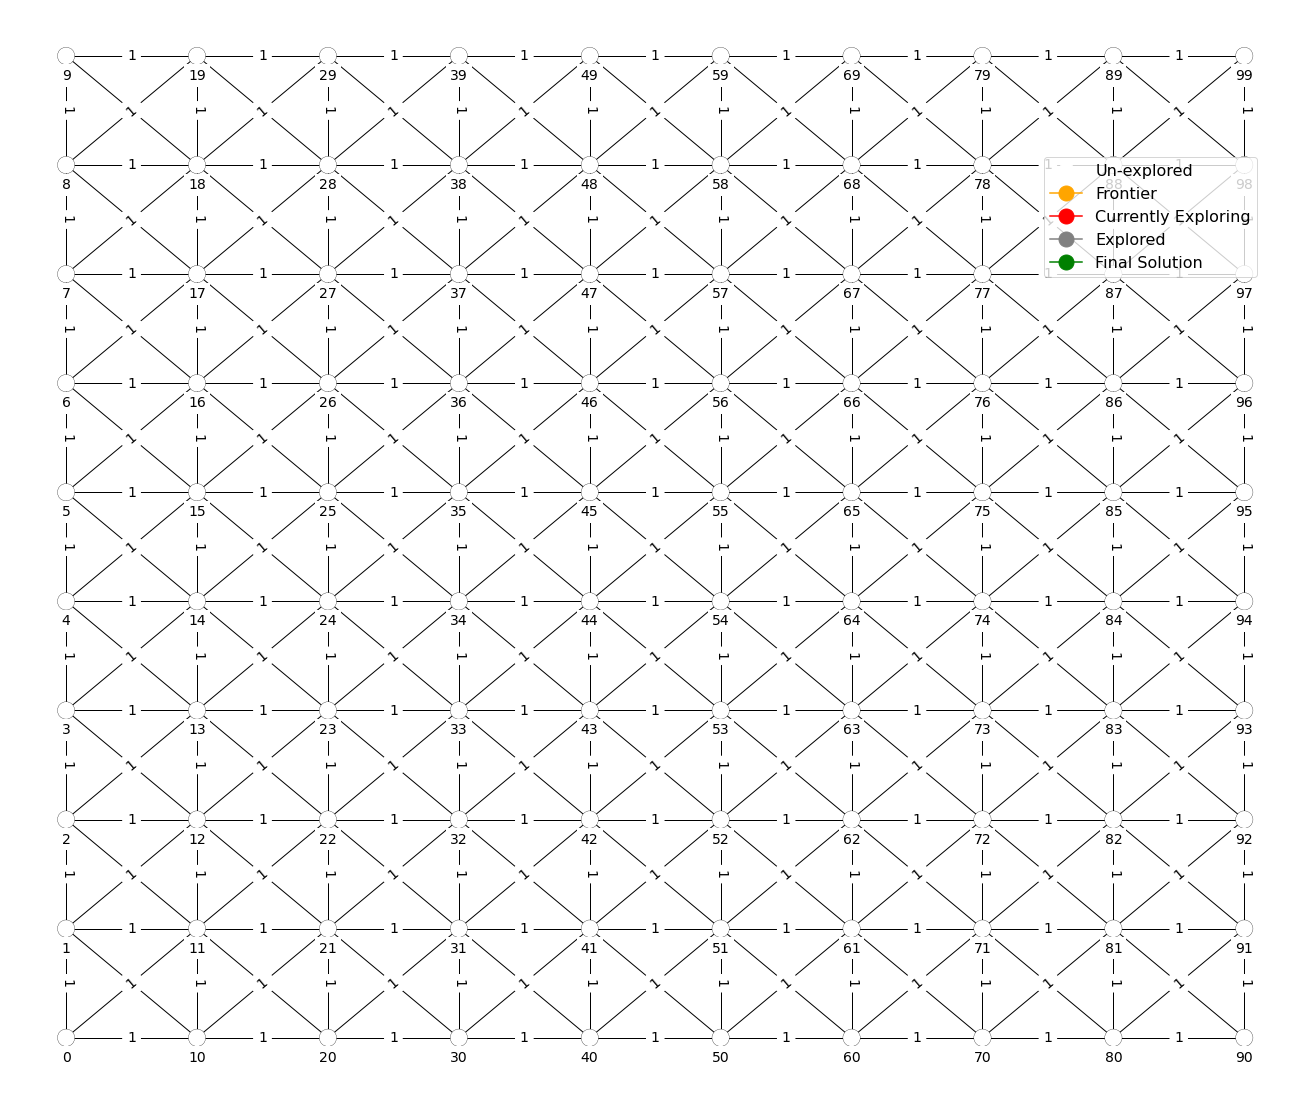

In [6]:
show_graph(mesh_graph_data)

### Selecting random position for the target player
This is so that the mesh problem below provides the enemy(agent) to find the position of the player within the mesh.
<br>
To modify the random value, randomly change the value of the seed to any value desired.

In [7]:
#generate seed for number generator
seed(3)

#define the random position of the player within the space
xPos = randint(0, width*grid_size)
yPos = randint(0, height*grid_size)

nearPlayerNode = '0' #provides the nearest node but set to string '0' by default
shortest_dist = 10000.0 #Set with max default

#find the nearest node to the player
for node in nodes:
    vecTup = node[1]
    distance = np.sqrt((vecTup[0] - xPos)**2+(vecTup[1] - yPos)**2)
    
    if distance < shortest_dist:
        shortest_dist = distance
        nearPlayerNode = node[0]

print("The nearest node to the PLAYER is: " + nearPlayerNode)

The nearest node to the PLAYER is: 39


### Selecting random position for the enemy agent
To modify the random value, randomly change the value of the seed to any value desired. NOTE: Avoid using the same seed value from the player.
<br>
<br>
Just for the purpose of this demonstration certain variables are redeclared here

In [8]:
#generate seed for number generator
seed(12)

#define the random position of the player within the space
xEnemyPos = randint(0, width*grid_size)
yEnemyPos = randint(0, height*grid_size)

closeEnemyNode = '0' #provides the nearest node to ENEMY but set to string '0' by default
shortest_dist = 10000.0 #Set with max default

#find the nearest node to the player
for node in nodes:
    vecTup = node[1]
    distance = np.sqrt((vecTup[0] - xEnemyPos)**2+(vecTup[1] - yEnemyPos)**2)
    
    if distance < shortest_dist:
        shortest_dist = distance
        closeEnemyNode = node[0]

print("The nearest node to the ENEMY is: " + closeEnemyNode)

The nearest node to the ENEMY is: 74


In [9]:
mesh_nav_problem = GraphProblem(closeEnemyNode, nearPlayerNode, mesh_graph)

## Setting Hueristics
This hueristic functions below are from what is provided from Lab 2 

In [10]:
def distance(a, b):
    """The distance between two (x, y) points."""
    
    xA, yA = a
    xB, yB = b
    return np.hypot((xA - xB), (yA - yB))
    #return np.sqrt((xA - xB)**2+(yA - yB)**2)

In [11]:
def heuristic_fun(x):
        locs = getattr(mesh_nav_problem.graph, 'locations', None)
        if locs:
            if type(mesh_nav_problem) is str:
                return int(distance(locs[x], locs[mesh_nav_problem.goal]))

            return int(distance(locs[x.state], locs[mesh_nav_problem.goal]))
        else:
            return np.inf

In [12]:
display(mesh_nav_problem, AStar(heuristic_fun))

Algorithm: AStar
7 paths have been expanded and 25 paths remain in the frontier
 Iteration times : 50  Path : [<Node 74>, <Node 64>, <Node 55>, <Node 46>, <Node 37>, <Node 28>, <Node 39>]


In [13]:
print("Position of the player: Node " + nearPlayerNode)
print("Position of the enemy: Node " + closeEnemyNode)
print(" ")

display_for_graph(mesh_nav_problem, AStar_for_graph(heuristic_fun), mesh_graph_data)

Position of the player: Node 39
Position of the enemy: Node 74
 
Algorithm: AStar_for_graph


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…